#### 무게를 찾기
- 데이터셋 : fish.csv
- 목표: 농어(Pearch) 길이 피쳐를 사용해서 무게를 예측하기
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습방법: 지도학습 > 회귀
- 알고리즘: 선형회귀 >> 데이터 분포가 선형의 형태

[1] 모듈 준비

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [86]:
file_path = '../data/fish.csv'

In [87]:
fishDF = pd.read_csv(file_path, usecols=[0, 1, 2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [88]:
# 종이 Perch인것만 가져오기
PerchDF = fishDF[fishDF['Species']=='Perch']

In [89]:
PerchDF.reset_index(drop= True, inplace=True)

[2-2] 결측치 확인

In [90]:
PerchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [91]:
PerchDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

[3] 상관계수

In [92]:
PerchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


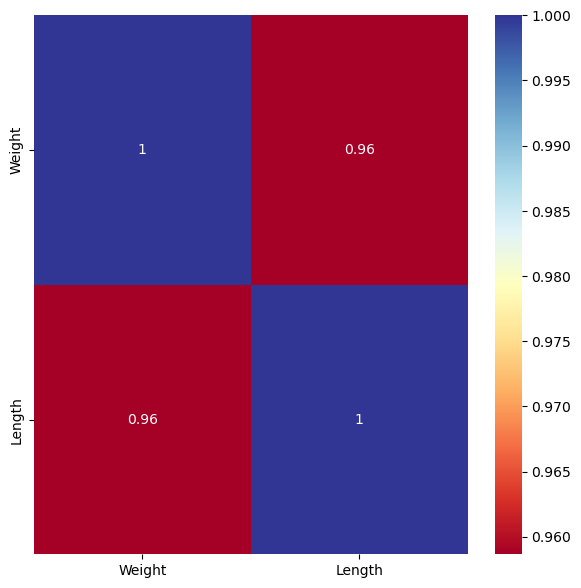

In [93]:
plt.figure(figsize=(7,7))
g = sns.heatmap(PerchDF.corr(numeric_only=True), annot=True, cmap='RdYlBu')

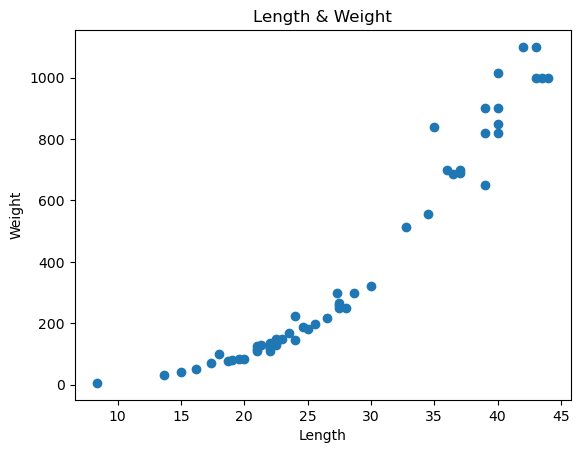

In [94]:

plt.scatter(PerchDF['Length'], PerchDF['Weight'])
plt.title('Length & Weight')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

[4] 학습준비

[4-1] 피쳐 타겟 설정

In [95]:
features = PerchDF[['Length']]
target = PerchDF['Weight']

print(f'features : {features.shape}, {features.ndim}차원')
print(f'target : {target.shape}, {target.ndim}차원')

features : (56, 1), 2차원
target : (56,), 1차원


[4-2] 훈련/테스트 데이터 분리

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# train:test = 80:20  , test_size=0.2
X_train, X_test, y_train, y_test  = train_test_split(features, target, test_size=0.2, random_state=10)

In [98]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (44, 1), 2D
y_train : (44,), 1D
X_test : (12, 1), 2D
y_test : (12,), 1D


[4-3] 피쳐 스케일링

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
# 인스턴스 생성
mmScaler = MinMaxScaler()

In [101]:
mmScaler.fit(X_train)

MinMaxScaler()

In [102]:
# 학습용 데이터, 스케일링
X_train_scaled=mmScaler.transform(X_train)

In [103]:
# 테스트용 데이터, 스케일링
X_test_scaled=mmScaler.transform(X_test)

[5] 학습 진행

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [106]:
# 학습 후 모델 파라미터
print(f' 기울기: {model.coef_}, 절편: {model.intercept_}')

 기울기: [1319.95069684], 절편: -333.8039704720598


[6] 성능 평가

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)

# 모델의 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mse : {mse}')
print(f'r2 : {r2}') 

mse : 8287.545439636207
r2 : 0.8386116153753963


[6-2] 회귀선 그리기

In [109]:
# y=ax+b
pre_jumsu = model.coef_[0]*X_train+model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1)


In [110]:
X_line = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100)
y_line = model.coef_[0]*X_line+model.intercept_

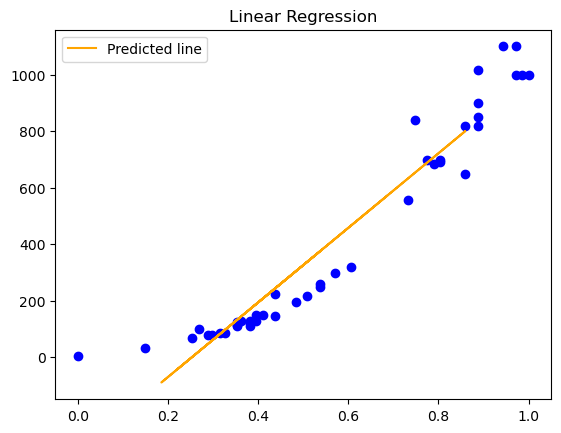

In [111]:
# predict로 회귀선그리기
plt.plot(X_train_scaled, y_train, 'bo') # bo 블루 포인트
plt.plot(X_test_scaled, y_pred, color='orange', label='Predicted line')
plt.title('Linear Regression')
plt.legend()
plt.show()

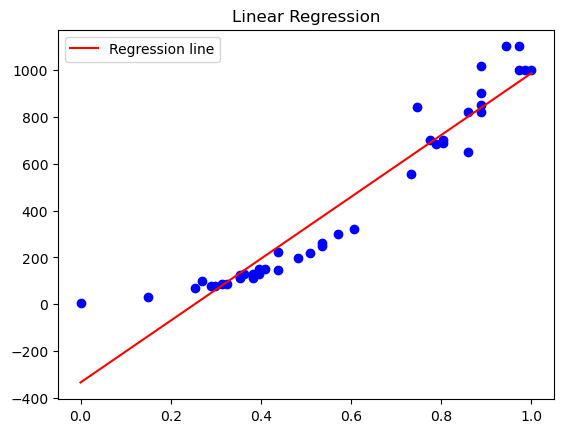

In [112]:
# 절편과 기울기를 이용해서 그리기
plt.plot(X_train_scaled, y_train, 'bo') # bo 블루 포인트
plt.plot(X_line, y_line, color='red', label='Regression line')
plt.title('Linear Regression')
plt.legend()
plt.show()

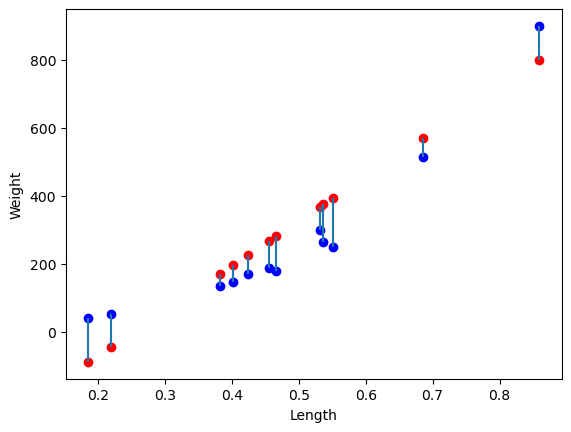

In [113]:
plt.plot(X_test_scaled, y_test, 'bo')
plt.plot(X_test_scaled, y_pred, 'ro')
plt.vlines(X_test_scaled, y_test, y_pred)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

[7] 교차검증

In [114]:
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate

In [115]:
#### cross_val_score
precict = cross_val_score(model,X_train_scaled,y_train,cv=3)

In [116]:
print(f'precict : {precict}')

precict : [0.93404809 0.92504505 0.89193298]
